<b><font size = '6'> Linear Regression | Salary Prediction </font>
</b>

* **Author:** Nthabiseng Seloana
* **Statement:**
  An employment agency has collected data regarding data scientists (salary and years of experience). The aim is to build a prediction model that would be utilized to determine the salary of a data scientist based on their years of experience.

### Importing Libraries

+ Basic manipulation and processing:
  * numpy
  * pandas
  * IPython.display  - used to provide a better display of the pandas DataFrames
+ Data Visualization:
  * matplotlib
  * seaborn
+ Machine learning methods that will be utilized from the sklearn library:
  * sklearn.linear_model for Linear Regression
  * sklearn.tree for Decision Tree Regression
  * sklearn.model_selection for Train Test Splitting
  * sklearn.metrics for Metrics scores (Mean Absolute Error, Mean Squared Error and R^2)

In [3]:
import numpy as np 
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Loading the Data:

In [8]:
df = pd.read_excel('SalariesVsExperience.xlsx', sheet_name='data')

## Understanding the Data:
Data inspection is performed in the following lines of code.
Displaying the summary of the data including the general information of the dataset will follow.

In [12]:
display(df.head(10))

,Years Experience,Salary
0,1.1,25805
1,1.3,21393
2,1.5,23266
3,2.0,28108
4,2.2,31532
5,2.9,38262
6,3.0,34826
7,3.2,32909
8,3.9,32737
9,4.2,36754


In [16]:
display(df.head(10))

,count,mean,std,min,25%,50%,75%,max
Years Experience,101.0,4.555446,2.801409,0.2,2.3,3.9,6.9,10.0
Salary,101.0,41078.029703,13414.617253,19097.0,31522.0,38281.0,50909.0,69765.0


The average salary is 41 078 with the estimated average years of experience of 4.6 years 

In [18]:
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Years Experience  101 non-null    float64
 1   Salary            101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


None

This dataset contains 2 columns namely 'Years Experience' which has a `float64` datatype and 'Salary' which has an `int64` datatype. There are 101 entries with no null values.

## Visualization 
The two features will be displayed using a scatter plot to visualize the relationship between them.

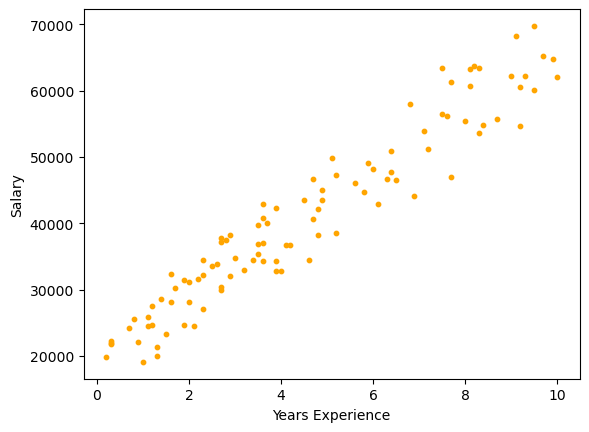

In [29]:
ax = df.plot.scatter(x='Years Experience', y='Salary', c='orange', s=10)

Through visualization, the data shows that the features have a linear relationship, which enables a linear regression model to be built. 

### Determining the correlation coefficient of the variables

In [35]:
corr_matrix = df.corr().to_numpy()
print(f'The correlation coefficient is {np.round(corr_matrix[0][1],4)}')

The correlation coefficient is 0.9597


## Building a Linear Regression Model

First, the training data needs to be split (input and output)

In [39]:
x_train = df['Years Experience'].to_frame()
y_train = df['Salary'].to_frame()

Constructing the model

In [42]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Extracting the model parameters

In [45]:
m = model.coef_[0][0]
c = model.intercept_[0]
print(f'Slope: {np.round(m,2)}, Intercept: {np.round(c,2)}')

Slope: 4595.54, Intercept: 20143.3


Regression Line Plotting

In [53]:
xn = np.linspace(0,10,101)
x_values = {'Years Experience' : xn}

x = pd.DataFrame(x_values)
y = model.predict(x)

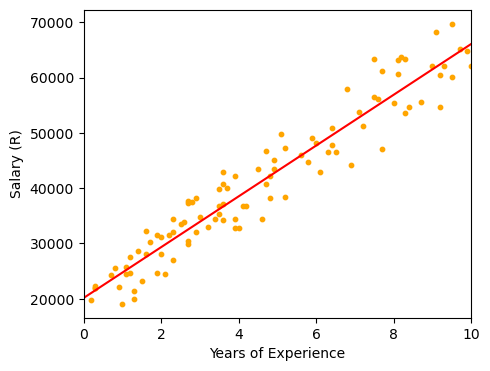

In [55]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(x_train, y_train, color='orange', s=10)
plt.plot(x,y, color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (R)')
plt.xlim([0,10])
plt.show()

Using the model to predict a specific salary for a number of years

In [58]:
x_value = {"Years Experience" :4}

x_pred = pd.DataFrame(x_value, index = [0])
y_pred = model.predict(x_pred)
y_value = y_pred[0][0]
print(f'For {x_value}, the predicted monthly salary is R{np.round(y_value,2)}.')

For {'Years Experience': 4}, the predicted monthly salary is R38525.46.
